In [1]:
import geopandas
import rasterio
import matplotlib.pyplot as plt
import gdal
import numpy as np
from osgeo import gdal
from osgeo import ogr
from osgeo import gdalconst
#import shapefile as shp

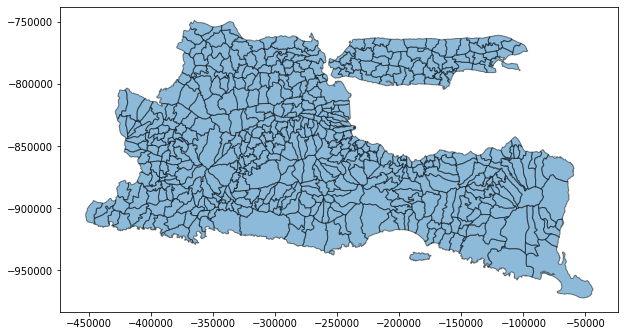

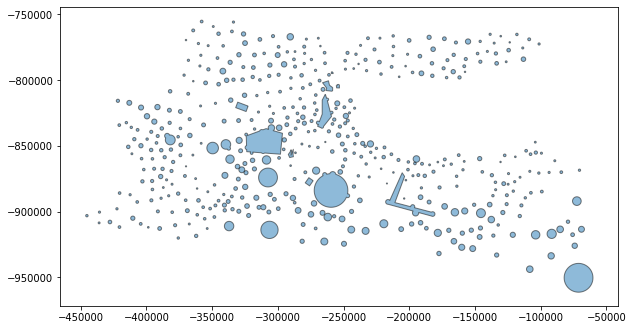

In [2]:
EjSpP = '.\Data\EastJava_Kec.shp'
EjSp = geopandas.read_file(EjSpP)
EjSp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
BuiltUpSpP = '.\Data\Kec_buffer.shp'
BuiltUpSp = geopandas.read_file(BuiltUpSpP)
BuiltUpSp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [114]:
type(EjSp)

geopandas.geodataframe.GeoDataFrame

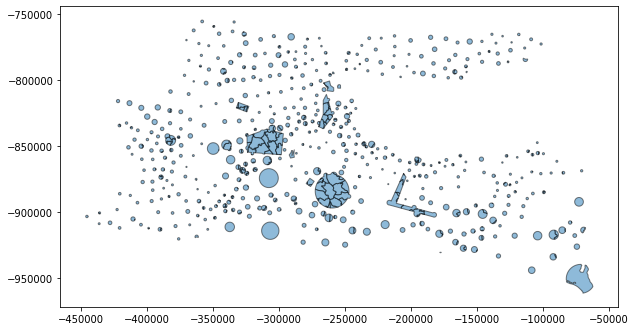

In [109]:
bp = 'BuiltData.shp'
bp = geopandas.read_file(bp)
bp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [108]:
bp

,POP_CHANGE,POP_1961,geometry
0,-1267.501495,39111,"POLYGON ((-135940.573 -872226.271, -135945.920..."
1,7574.694572,96843,"POLYGON ((-90700.944 -913627.203, -90660.590 -..."
2,-6101.464974,96131,"MULTIPOLYGON (((-72482.540 -895391.748, -72533..."
3,13530.970550,101946,"POLYGON ((-103848.879 -920945.480, -103899.490..."
4,3503.158339,73514,"MULTIPOLYGON (((-83008.146 -912381.202, -83103..."
...,...,...,...
484,-2422.759699,37161,"MULTIPOLYGON (((-108773.517 -770118.628, -1088..."
485,-910.899266,28555,"POLYGON ((-101241.907 -773409.553, -101267.836..."
486,-10769.148630,64564,"MULTIPOLYGON (((-327955.110 -866094.394, -3279..."
487,-5109.263736,42924,"MULTIPOLYGON (((-323453.595 -869107.904, -3234..."


In [98]:
BuiltUpSp = BuiltUpSp[['OBJECTID','geometry']]
type(BuiltUpSp)# BuiltUpSp = BuiltUpSp.iloc[:,1:2])

geopandas.geodataframe.GeoDataFrame

In [102]:
BuiltData = geopandas.overlay(EjSp, BuiltUpSp, how='intersection')


In [109]:
 gdal.GDT_Float64

geopandas.geodataframe.GeoDataFrame

In [105]:
BuiltData = BuiltData[['POP_CHANGE','POP_1961','geometry']]

In [203]:
BuiltData.plot()

AttributeError: 'DataSource' object has no attribute 'plot'

In [111]:
BuiltData.to_file('BuiltData.shp')

In [5]:
import gdal
from osgeo import osr
from osgeo import ogr

raster_path = 'BuiltData.tif'
shapefile = 'BuiltData.shp'
# 1) opening the shapefile    
source_ds = ogr.Open(shapefile)
source_layer = source_ds.GetLayer()

# 2) Creating the destination raster data source
pixelWidth = pixelHeight = 100 # depending how fine you want your raster ##COMMENT 1
x_min, x_max, y_min, y_max = source_layer.GetExtent()
cols = int((x_max - x_min) / pixelHeight)
rows = int((y_max - y_min) / pixelWidth)


In [111]:
target_ds = gdal.GetDriverByName('GTiff').Create(raster_path, cols, rows, 1,  gdal.GDT_Float64) ##COMMENT 2


In [57]:
target_ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001DBC9948E10> >

In [110]:
target_ds.SetGeoTransform((x_min, pixelWidth, 0, y_max, 0, -pixelHeight))
band = target_ds.GetRasterBand(1)
NoData_value = -99
burnVal = 0
band.SetNoDataValue(NoData_value)
band.FlushCache()
gdal.RasterizeLayer(target_ds, [1], source_layer,burn_values=[burnVal] )#options=["ATTRIBUTE=POP_CHANGE"])

AttributeError: 'NoneType' object has no attribute 'SetGeoTransform'

In [99]:
target_ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001DBCD1F4540> >

In [100]:
target_ds = None

In [ ]:
RasterXSize = 3000
RasterYSize = 2000

In [101]:
rb.GetDataset( )

NameError: name 'rb' is not defined

In [83]:
raster_path

'BuiltData.tif'

In [102]:
rs = gdal.Open(raster_path)

In [103]:
rs.GetProjection()

''

In [104]:
type(rs.GetRasterBand(1))
a = rs.GetRasterBand(1)

In [105]:
a = rs.ReadAsArray()
#a2 = np.where(a==-9999, np.NaN, a) 

In [106]:
a

array([[-99., -99., -99., ..., -99., -99., -99.],
       [-99., -99., -99., ..., -99., -99., -99.],
       [-99., -99., -99., ..., -99., -99., -99.],
       ...,
       [-99., -99., -99., ..., -99., -99., -99.],
       [-99., -99., -99., ..., -99., -99., -99.],
       [-99., -99., -99., ..., -99., -99., -99.]])

In [107]:
a.sum()

-786375612.0

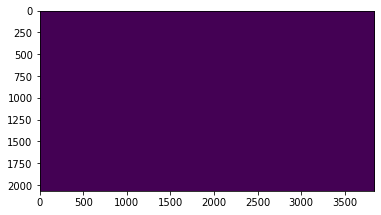

In [94]:
plt.imshow(a)
plt.show()

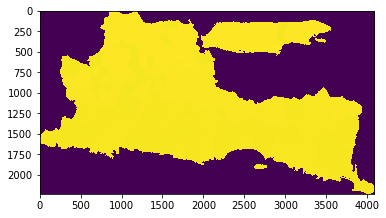

In [38]:
rs.ReadAsArray
type(a)
img_array = a.ReadAsArray()

imgplot2 = plt.imshow(img_array)
plt.show()

In [64]:
img_array[1,1]=-32768
img = np.where(img_array==-32768, np.NaN, img_array) 

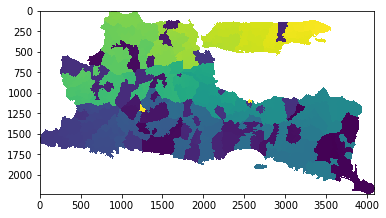

In [65]:
imgplot2 = plt.imshow(img)
plt.show()

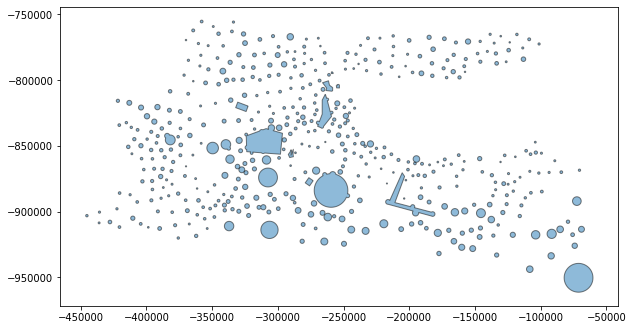

In [66]:
df = geopandas.read_file('.\Data\Kec_buffer.shp')
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [67]:
from osgeo import gdal, ogr

# Define pixel_size and NoData value of new raster
pixel_size = 25
NoData_value = -9999

# Filename of input OGR file
vector_fn = 'test.shp'

# Filename of the raster Tiff that will be created
raster_fn = 'test.tif'

# Open the data source and read in the extent
source_ds = ogr.Open(vector_fn)
source_layer = source_ds.GetLayer()
x_min, x_max, y_min, y_max = source_layer.GetExtent()

# Create the destination data source
x_res = int((x_max - x_min) / pixel_size)
y_res = int((y_max - y_min) / pixel_size)
target_ds = gdal.GetDriverByName('GTiff').Create(raster_fn, x_res, y_res, 1, gdal.GDT_Byte)
target_ds.SetGeoTransform((x_min, pixel_size, 0, y_max, 0, -pixel_size))
band = target_ds.GetRasterBand(1)
band.SetNoDataValue(NoData_value)

# Rasterize
gdal.RasterizeLayer(target_ds, [1], source_layer, burn_values=[0])

AttributeError: 'NoneType' object has no attribute 'GetLayer'

In [ ]:
from osgeo import gdal, ogr

tileHdl = "/home/zeito/pyqgis_data/aleatorio.tif"
tempRasterPath = "/home/zeito/pyqgis_data/"
tileName = "aleatorio"

vector_layer = "/home/zeito/pyqgis_data/buildingPolys.shp"

# open the raster layer and get its relevant properties
tileHdl = gdal.Open(raster_layer, gdal.GA_ReadOnly)

tileGeoTransformationParams = tileHdl.GetGeoTransform()
projection = tileHdl.GetProjection()

rasterDriver = gdal.GetDriverByName('GTiff')

buildingPolys_ds = ogr.Open(vector_layer)
buildingPolys = buildingPolys_ds.GetLayer()

# Create the destination data source
tempSource = rasterDriver.Create(tempRasterPath + tileName + "_Building.tif", 
                                 tileHdl.RasterXSize, 
                                 tileHdl.RasterYSize,
                                 1, #missed parameter (band)
                                 gdal.GDT_Float32)

tempSource.SetGeoTransform(tileGeoTransformationParams)
tempSource.SetProjection(projection)
tempTile = tempSource.GetRasterBand(1)
tempTile.Fill(-999)
tempTile.SetNoDataValue(-999)

gdal.RasterizeLayer(tempSource, [1], buildingPolys, options=["ATTRIBUTE=value"])
tempSource = None

In [ ]:
ndsm = '/home/zeito/pyqgis_data/utah_demUTM2.tif'
shp = '/home/zeito/pyqgis_data/polygon8.shp'
data = gdal.Open(ndsm, gdalconst.GA_ReadOnly)
geo_transform = data.GetGeoTransform()
#source_layer = data.GetLayer()
x_min = geo_transform[0]
y_max = geo_transform[3]
x_max = x_min + geo_transform[1] * data.RasterXSize
y_min = y_max + geo_transform[5] * data.RasterYSize
x_res = data.RasterXSize
y_res = data.RasterYSize
mb_v = ogr.Open(shp)
mb_l = mb_v.GetLayer()
pixel_width = geo_transform[1]
output = '/home/zeito/pyqgis_data/my.tif'
target_ds = gdal.GetDriverByName('GTiff').Create(output, x_res, y_res, 1, gdal.GDT_Byte)
target_ds.SetGeoTransform((x_min, pixel_width, 0, y_min, 0, pixel_width))
band = target_ds.GetRasterBand(1)
NoData_value = -999999
band.SetNoDataValue(NoData_value)
band.FlushCache()
gdal.RasterizeLayer(target_ds, [1], mb_l, options=["ATTRIBUTE=hedgerow"])

target_ds = None